# 数据文件的读取详解

* read_csv的常用参数
* names,sep,dtype,header,parse_dates,encoding

In [1]:
import numpy as np
import pandas as pd

In [3]:
#help(pd.read_csv)

* sep 用来定义分隔符

* names用来自定义列表

* dtype来定义列的类型，特别是想改变默认类型的时候

In [7]:
r1=pd.read_csv(r"D:\t_alibaba_data3.txt",names=["user","brand","behavr","date"],sep="\t",dtype={"behavr":int})
r1.head()

,user,brand,behavr,date
0,10944750,13451,0,06/04
1,10944750,13451,2,06/04
2,10944750,13451,2,06/04
3,10944750,13451,0,06/04
4,10944750,13451,0,06/04


In [9]:
#r1.behavr

In [11]:
r1=pd.read_csv(r"D:\try\t_alibaba_data31.txt",sep="\t")
r1.head()

,user,brand,behavr,date
0,10944750,13451,0,06/04
1,10944750,13451,2,06/04
2,10944750,13451,2,06/04
3,10944750,13451,0,06/04
4,10944750,13451,0,06/04


* header用来设置使用数据第几行作为列标，和names联合使用可以替代数据列标

In [18]:
r1=pd.read_csv(r"D:\try\t_alibaba_data31.txt",names=["a","b","c","d"],header=0,sep="\t")
r1.head()

,a,b,c,d
0,10944750,13451,0,06/04
1,10944750,13451,2,06/04
2,10944750,13451,2,06/04
3,10944750,13451,0,06/04
4,10944750,13451,0,06/04


* parse_dates用来自动解析时间数据，注意前提是格式要符合要求

In [20]:
r1=pd.read_csv(r"D:\try\t_alibaba_data311.txt",names=["a","b","c","d"], header=0, sep="\t",parse_dates=[3])
r1.head()
#通过parse_dates自动解析时间数据，[3]代表解析3号位也就是第四列数据cv

,a,b,c,d
0,10944750,13451,0,2011-06-04
1,10944750,13451,2,2011-06-04
2,10944750,13451,2,2011-06-04
3,10944750,13451,0,2011-06-04


In [21]:
r1.d

0   2011-06-04
1   2011-06-04
2   2011-06-04
3   2011-06-04
Name: d, dtype: datetime64[ns]

* xls数据用read_xls，xls转化csv
* encoding用来定义解析数据使用的编码格式，默认使用utf-8来进行解析，当你发现数据无法解析的时候可以尝试更换编码格式，再读取带中文的数据，特别是xls转成的csv数据时很常用

除utf-8外的主要中文编码：gb2312 gbk gb18030

In [23]:
r1=pd.read_csv(r"D:\try\xxx.csv",encoding="gb18030")
r1.head()

,姓名,企业,部门,职位,工号,响应状态,签到时间,是否迟到,非受邀
0,项欣瑶,杭州师范大学阿里巴巴商学院,杭州师范大学阿里巴巴商学院-在校学生-在校本科生-电子商务-19级-电商191,NaN,NaN,未响应,2019-10-15 11:59:52,迟到,NaN
1,斯煜佳,杭州师范大学阿里巴巴商学院,杭州师范大学阿里巴巴商学院-在校学生-在校本科生-国际商务-19级-国商191,NaN,NaN,未响应,2019-10-15 11:59:52,迟到,NaN
2,王佳旋,杭州师范大学阿里巴巴商学院,杭州师范大学阿里巴巴商学院-在校学生-在校本科生-电子商务-19级-电商191,NaN,NaN,未响应,2019-10-15 11:59:54,迟到,NaN
3,罗佳怡,杭州师范大学阿里巴巴商学院,杭州师范大学阿里巴巴商学院-在校学生,NaN,NaN,未响应,2019-10-15 11:59:54,迟到,NaN
4,张滨滨,杭州师范大学阿里巴巴商学院,杭州师范大学阿里巴巴商学院-在校学生,NaN,NaN,未响应,2019-10-15 11:59:54,迟到,NaN


* chunksize 当数据超出内存总量时通过设置chunksize来分段读取其中部分，chunksize用来定义一次读取的行数

In [34]:
pd.read_csv(r"D:\t_alibaba_data3.txt",names=["user","brand","behavr","date"],sep="\t",chunksize=10)

In [24]:
k=0
for i in pd.read_csv(r"D:\t_alibaba_data3.txt",names=["user","brand","behavr","date"],sep="\t",chunksize=10):
    print(i)
    k=k+1
    if k==3:break
#加了chunksize的read_csv变成了一个迭代子,每次读入十行数据

       user  brand  behavr   date
0  10944750  13451       0  06/04
1  10944750  13451       2  06/04
2  10944750  13451       2  06/04
3  10944750  13451       0  06/04
4  10944750  13451       0  06/04
5  10944750  13451       0  06/04
6  10944750  13451       0  06/04
7  10944750  13451       0  06/04
8  10944750  21110       0  06/07
9  10944750   8689       0  05/02
        user  brand  behavr   date
10  10944750   8689       2  05/02
11  10944750   8689       2  05/02
12  10944750   8689       0  05/02
13  10944750   8689       0  05/02
14  10944750  26619       0  06/28
15  10944750   5185       0  07/10
16  10944750  18575       0  05/02
17  10944750  23662       0  06/19
18  10944750  23662       0  06/19
19  10944750  15761       0  04/24
        user  brand  behavr   date
20  10944750  15761       0  04/24
21  10944750  15761       0  04/24
22  10944750  15761       0  04/24
23  10944750  19673       0  07/05
24  10944750  19673       0  07/05
25  10944750  19673       0  07

In [25]:
k=0
for i in pd.read_csv(r"D:\t_alibaba_data3.txt",names=["user","brand","behavr","date"],sep="\t",chunksize=30):
    z=i.groupby("brand").size()
    #print(z)
    if k==0:
        s=z
    else:
        s=s.add(z,fill_value=0)
    k=k+1
    if k==3:break
print(s)

#统计后的结果往往比原始记录小
#结果合并的方法根据统计结果而定，如果结果是数据框，则可能需要concat

brand
1996      4.0
4078      1.0
5185      1.0
6290      3.0
7373      4.0
8628      5.0
8689      5.0
9817      1.0
11465     1.0
13451     8.0
13779     1.0
14580     1.0
15315     2.0
15761     4.0
15980     1.0
18575     1.0
19673     7.0
21110     1.0
21501     4.0
23251     3.0
23662     2.0
25687    29.0
26619     1.0
dtype: float64


# 课间题

* 请尝试读入t_alibaba_data31，列标就使用其数据第一行，注意brand id要设置为字符串

* 请尝试读入t_alibaba_data31，列标用a,b,c,d替代

* 请读入t_alibaba_data311，注意其时间列要读为时间戳

* 请自行把“2019-10-15日程的签到详情(1)”转为csv格式，文件名随意，然后读入，注意编码设置



### json数据的读取问题

* pandas对json数据的读取本质上都是要把json数据转换为数据框

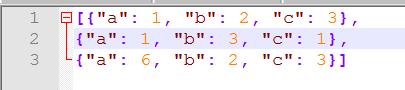

In [16]:
from IPython.display import Image
Image("4.png")
#json数据的标准格式

In [26]:
d = pd.read_json(r'D:\try\js1.json')
print(d)
#注意pandas要求的json数据要符合上面的标准格式

   a  b  c
0  1  2  3
1  1  3  1
2  6  2  3


In [28]:
d1 = pd.read_json(r'D:\try\shoes1.json')
d1
#注意info中的双层结构并没有被解析,read_json通常只能解析一层

,_id,info,itemid,location,nick,price,sales,title,url
0,{'$oid': '5aa77041be9b0338dc1faab4'},"{'上市年份季节': '2018年春季', '货号': '8142ZR90254W', '销...",562121114807,浙江 丽水,意尔康皮鞋旗舰店,269,1583人付款,意尔康男鞋2018春季新款英伦真皮商务休闲皮鞋青年男士皮鞋子男潮,http://detail.tmall.com/item.htm?id=5621211148...
1,{'$oid': '5aa77042be9b0338dc1faab5'},"{'上市年份季节': '2017年秋季', '货号': '7341ZL97655W', '销...",545941839337,浙江 丽水,意尔康皮鞋旗舰店,199,1607人付款,意尔康旗舰店官方店男鞋春秋真皮爸爸鞋中老年人商务休闲皮鞋子男,http://detail.tmall.com/item.htm?id=5459418393...
2,{'$oid': '5aa77042be9b0338dc1faab6'},"{'鞋垫材质': '二层猪皮', '鞋跟高': '平跟(小于等于1cm)', '品牌': '...",563340844728,浙江 温州,吸引力xl,148,248人付款,2017新款正品意尔康男鞋男士商务正装皮鞋透气真皮系带尖头办公室,http://item.taobao.com/item.htm?id=56334084472...
3,{'$oid': '5aa77042be9b0338dc1faab7'},"{'货号': '883053', '鞋垫材质': '头层猪皮', '鞋跟高': '平跟(小于...",561684297836,浙江 温州,乙方乙方88888,158,195人付款,皮鞋男正品意尔康休闲商务真皮一脚蹬爸爸鞋春季新款圆头透气男鞋,http://item.taobao.com/item.htm?id=56168429783...
4,{'$oid': '5aa77042be9b0338dc1faab8'},"{'上市年份季节': '2017年秋季', '货号': '7511ZE97187W', '销...",555004335522,浙江 丽水,意尔康男鞋旗舰店,279,37人付款,意尔康男鞋2018春季真皮套脚休闲鞋潮流新款舒适一脚蹬单鞋皮鞋,http://detail.tmall.com/item.htm?id=5550043355...


In [30]:
#d1.info

In [32]:
 from pandas.io.json import json_normalize

In [33]:
c1=json_normalize(d1["info"])
c1
#多层结构可以使用json_normalize进行进一步的解析，对于无法对应的列默认置空

,上市年份季节,低帮鞋品名,功能,品牌,图案,场合,季节,尺码,款式,流行元素,...,闭合方式,鞋制作工艺,鞋垫材质,鞋头款式,鞋底材质,鞋跟高,鞋面内里材质,鞋面材质,颜色分类,风格
0,2018年春季,商务休闲鞋,轻质,YEARCON/意尔康,纯色,日常,春秋,383940414243,商务休闲鞋,NaN,...,松紧带,注压鞋,PU,圆头,塑胶,NaN,PU,头层牛皮（除牛反绒）,黑色土黄,商务
1,2017年秋季,商务休闲鞋,轻质,YEARCON/意尔康,纯色,办公室,夏季,38394041424344,商务休闲鞋,金属,...,套脚,注压鞋,二层猪皮,圆头,塑胶,低跟(1-3cm),二层猪皮,头层牛皮（除牛反绒）,黑色棕色黑色加绒版棕色加绒版黑色镂空棕色镂空,商务
2,NaN,NaN,透气,YEARCON/意尔康,纯色,办公室,春秋,38 39 40 41 42 43 44,德比鞋（正装皮鞋）,车缝线,...,系带,胶粘鞋,二层猪皮,尖头,橡胶,平跟(小于等于1cm),二层猪皮,头层牛皮（除牛反绒）,黑色,商务
3,NaN,NaN,透气,YEARCON/意尔康,纯色,日常,冬季,37 38 39 40 41 42 43 44,商务休闲鞋,素面,...,套脚,注压鞋,头层猪皮,圆头,橡胶,平跟(小于等于1cm),头层猪皮,头层牛皮（除牛反绒）,黑色真皮 棕色真皮 黑色加绒真皮 棕色加绒真皮,商务
4,2017年秋季,休闲皮鞋,耐磨,YEARCON/意尔康,纯色,日常,春秋,383940414243,休闲皮鞋,车缝线,...,套脚,胶粘鞋,二层猪皮,圆头,橡胶,平跟(小于等于1cm),布,头层牛皮（除牛反绒）,黑色单鞋土黄单鞋,休闲


# 课间题

* 请自行读入js1与shoes1两份数据

* 请解析下shoes1的info列